In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Primeira fase (prova objetiva)

In [2]:
resultado_f1_preliminar = pd.read_csv('20210330-resultado_preliminar_prova_objetiva.csv')
resultado_f1_final = pd.read_csv('20210406-resultado_final_prova_objetiva.csv')

resultado_f1_preliminar['Ações Afirmativas'].fillna('', inplace=True)
resultado_f1_final['Ações Afirmativas'].fillna('', inplace=True)

resultado_f1_merge = pd.merge(resultado_f1_preliminar, resultado_f1_final, how='outer', on='Inscrição', suffixes=(' Preliminar', ' Final'))
resultado_f1_merge.sample(n=3)

,Inscrição,Nome do Candidato Preliminar,Pontuação Preliminar,Ações Afirmativas Preliminar,Classificado Preliminar,Nome do Candidato Final,Pontuação Final,Ações Afirmativas Final,Classificado Final
62,898,Luan Carlos Soares Pereira,9,PPI,1,Luan Carlos Soares Pereira,11,PPI,1
116,673,Richard Medeiros Turra,11,,0,Richard Medeiros Turra,13,,0
121,450,Antônio Nunes Pereira,10,,0,Antônio Nunes Pereira,11,,0


## Verificação dos dados importados

In [3]:
print("Nomes diferentes:", (resultado_f1_merge['Nome do Candidato Preliminar'] != resultado_f1_merge['Nome do Candidato Final']).sum())
print("Ações Afirmativas diferentes:", (resultado_f1_merge['Ações Afirmativas Preliminar'] != resultado_f1_merge['Ações Afirmativas Final']).sum())

Nomes diferentes: 0
Ações Afirmativas diferentes: 0


## Formatando a tabela

In [4]:
resultado_f1 = resultado_f1_merge[['Inscrição', 'Nome do Candidato Preliminar', 'Ações Afirmativas Preliminar', 'Pontuação Preliminar', 'Pontuação Final', 'Classificado Preliminar', 'Classificado Final']]
resultado_f1 = resultado_f1.rename(columns={'Nome do Candidato Preliminar': 'Nome do Candidato', 'Ações Afirmativas Preliminar': 'Ações Afirmativas'})
resultado_f1.sample(n=5)

,Inscrição,Nome do Candidato,Ações Afirmativas,Pontuação Preliminar,Pontuação Final,Classificado Preliminar,Classificado Final
215,671,Regina Lacerda Pinheiro Araújo,,5,7,0,0
210,688,Fabricio Augusto Domingues De Oliveira,,5,7,0,0
38,796,Adonias Josue Perassoli Junior,,14,16,1,1
60,753,Laís Maaséias Lopes,PPI,9,11,1,1
14,1003,Magno Tairone De Freitas Severino,PPI,17,18,1,1


## Classificados

In [5]:
print("Total classificados (Preliminar) =", resultado_f1['Classificado Preliminar'].sum())
print("Total classificados (Final) =", resultado_f1['Classificado Final'].sum())

Total classificados (Preliminar) = 64
Total classificados (Final) = 73


In [6]:
corte_p = min(resultado_f1[(resultado_f1['Ações Afirmativas'] == '') & (resultado_f1['Classificado Preliminar'] == 1)]['Pontuação Preliminar'])
corte_f = min(resultado_f1[(resultado_f1['Ações Afirmativas'] == '') & (resultado_f1['Classificado Final'] == 1)]['Pontuação Final'])
print("Nota de corte (Preliminar) =", corte_p)
print("Nota de corte (Final) =", corte_f)

Nota de corte (Preliminar) = 14
Nota de corte (Final) = 15


In [7]:
resultado_f1['Diferença'] = resultado_f1['Pontuação Final'] - resultado_f1['Pontuação Preliminar']

pd.set_option('display.max_rows', 80)
resultado_f1[resultado_f1['Classificado Final'] == 1].sort_values(by=['Pontuação Final', 'Diferença', 'Nome do Candidato'], ascending=[False, True, True])

,Inscrição,Nome do Candidato,Ações Afirmativas,Pontuação Preliminar,Pontuação Final,Classificado Preliminar,Classificado Final,Diferença
0,650,Carlos Danilo Tomé,,18,19,1,1,1
1,834,Lucas Galdino De Camargo,,18,19,1,1,1
2,976,Vinicius Vieira Albano,,18,19,1,1,1
4,840,Carolina Ensfeld Lueders,,17,19,1,1,2
6,705,Daniel Vargas Shimamoto,,17,19,1,1,2
9,524,Mário Mitsuo Akita,,17,19,1,1,2
11,818,Omar Hajime Fidelis,,17,19,1,1,2
12,355,Weld Lucas Cunha,,17,19,1,1,2
3,988,Amanda Rodrigues Da Silva,,17,18,1,1,1
5,702,Catia Michele Tondolo,,17,18,1,1,1


## Distribuição de notas

### Preliminar

In [8]:
resultado_f1['Pontuação Preliminar'].describe()

count    234.000000
mean      10.264957
std        3.863315
min        0.000000
25%        8.000000
50%       10.000000
75%       13.000000
max       18.000000
Name: Pontuação Preliminar, dtype: float64

In [9]:
resultado_f1.groupby(resultado_f1['Pontuação Preliminar']).agg({'Inscrição': 'count', 'Classificado Preliminar': 'sum'}).sort_index(ascending = False)

,Inscrição,Classificado Preliminar
Pontuação Preliminar,,
18,3,3
17,12,12
16,4,4
15,19,19
14,14,14
13,18,1
12,18,2
11,26,4
10,20,0


<AxesSubplot:>

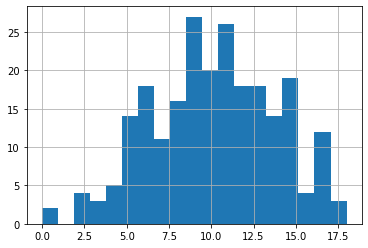

In [10]:
resultado_f1['Pontuação Preliminar'].hist(bins=19)

### Final

In [11]:
resultado_f1['Pontuação Final'].describe()

count    234.000000
mean      12.004274
std        3.798009
min        2.000000
25%        9.000000
50%       12.000000
75%       15.000000
max       19.000000
Name: Pontuação Final, dtype: float64

In [12]:
resultado_f1.groupby(resultado_f1['Pontuação Final']).agg({'Inscrição': 'count', 'Classificado Final': 'sum'}).sort_index(ascending = False)

,Inscrição,Classificado Final
Pontuação Final,,
19,8,8
18,9,9
17,18,18
16,15,15
15,13,13
14,22,2
13,22,3
12,16,1
11,32,4


<AxesSubplot:>

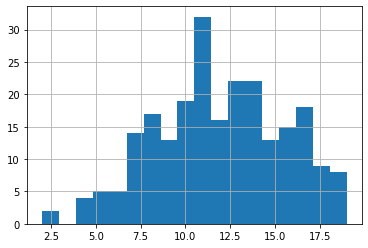

In [13]:
resultado_f1['Pontuação Final'].hist(bins=18)

# Segunda fase (carta de intenções)

In [53]:
resultado_f2 = pd.read_csv('20210407-resultado_preliminar.csv')
resultado_f2['A.A.'].fillna('', inplace=True)

resultado = pd.merge(resultado_f1, resultado_f2, how='right', on='Inscrição').sort_values(by='Classificação')
resultado.head()

,Inscrição,Nome do Candidato,Ações Afirmativas,Pontuação Preliminar,Pontuação Final,Classificado Preliminar,Classificado Final,Diferença,Classificação,Nome,Prova Objetiva,Carta de Intenções,Nota Final,A.A.
0,650,Carlos Danilo Tomé,,18,19,1,1,1,1,Carlos Danilo Tomé,19,9.30,28.30,
1,834,Lucas Galdino De Camargo,,18,19,1,1,1,2,Lucas Galdino De Camargo,19,9.15,28.15,
2,818,Omar Hajime Fidelis,,17,19,1,1,2,3,Omar Hajime Fidelis,19,9.10,28.10,
3,355,Weld Lucas Cunha,,17,19,1,1,2,4,Weld Lucas Cunha,19,9.00,28.00,
4,705,Daniel Vargas Shimamoto,,17,19,1,1,2,5,Daniel Vargas Shimamoto,19,8.85,27.85,


## Verificação dos dados importados

In [15]:
print('Quantidade de classificados correta?', resultado_f2['Inscrição'].count() == resultado_f1['Classificado Final'].sum())
print('Diferenças Nomes:', (resultado['Nome do Candidato'] != resultado['Nome']).sum())
print('Diferenças Ações Afirmativas:', (resultado['Ações Afirmativas'].apply(lambda x: 'X' if x == 'PPI' else x) != resultado['A.A.']).sum())
print('Diferenças Prova Objetiva:', (resultado['Pontuação Final'] != resultado['Prova Objetiva']).sum())
print('Diferenças Nota Final', (abs(resultado['Prova Objetiva'] + resultado['Carta de Intenções'] - resultado['Nota Final']) > 1e-3).sum())

Quantidade de classificados correta? True
Diferenças Nomes: 0
Diferenças Ações Afirmativas: 0
Diferenças Prova Objetiva: 0
Diferenças Nota Final 0


## Distribuição das Notas

In [16]:
resultado['Carta de Intenções'].describe()

count    73.000000
mean      8.396301
std       0.884566
min       6.250000
25%       7.900000
50%       8.600000
75%       9.100000
max      10.000000
Name: Carta de Intenções, dtype: float64

In [17]:
resultado.groupby(
    pd.cut(resultado['Carta de Intenções'], np.arange(min(resultado['Carta de Intenções']), 10+.25, .25), include_lowest=True)
).agg({'Inscrição': 'count'}).sort_index(ascending = False)

,Inscrição
Carta de Intenções,
"(9.75, 10.0]",1
"(9.5, 9.75]",3
"(9.25, 9.5]",8
"(9.0, 9.25]",9
"(8.75, 9.0]",7
"(8.5, 8.75]",10
"(8.25, 8.5]",3
"(8.0, 8.25]",7
"(7.75, 8.0]",11


<AxesSubplot:>

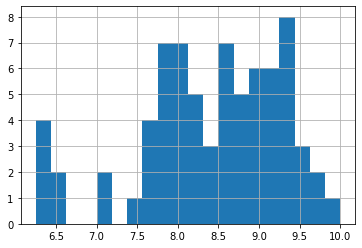

In [18]:
resultado['Carta de Intenções'].hist(bins=20)

# Resultado Geral

In [74]:
resultado['Nota Final'].describe()

count    73.000000
mean     24.533288
std       2.406360
min      18.400000
25%      23.400000
50%      24.900000
75%      26.300000
max      28.300000
Name: Nota Final, dtype: float64

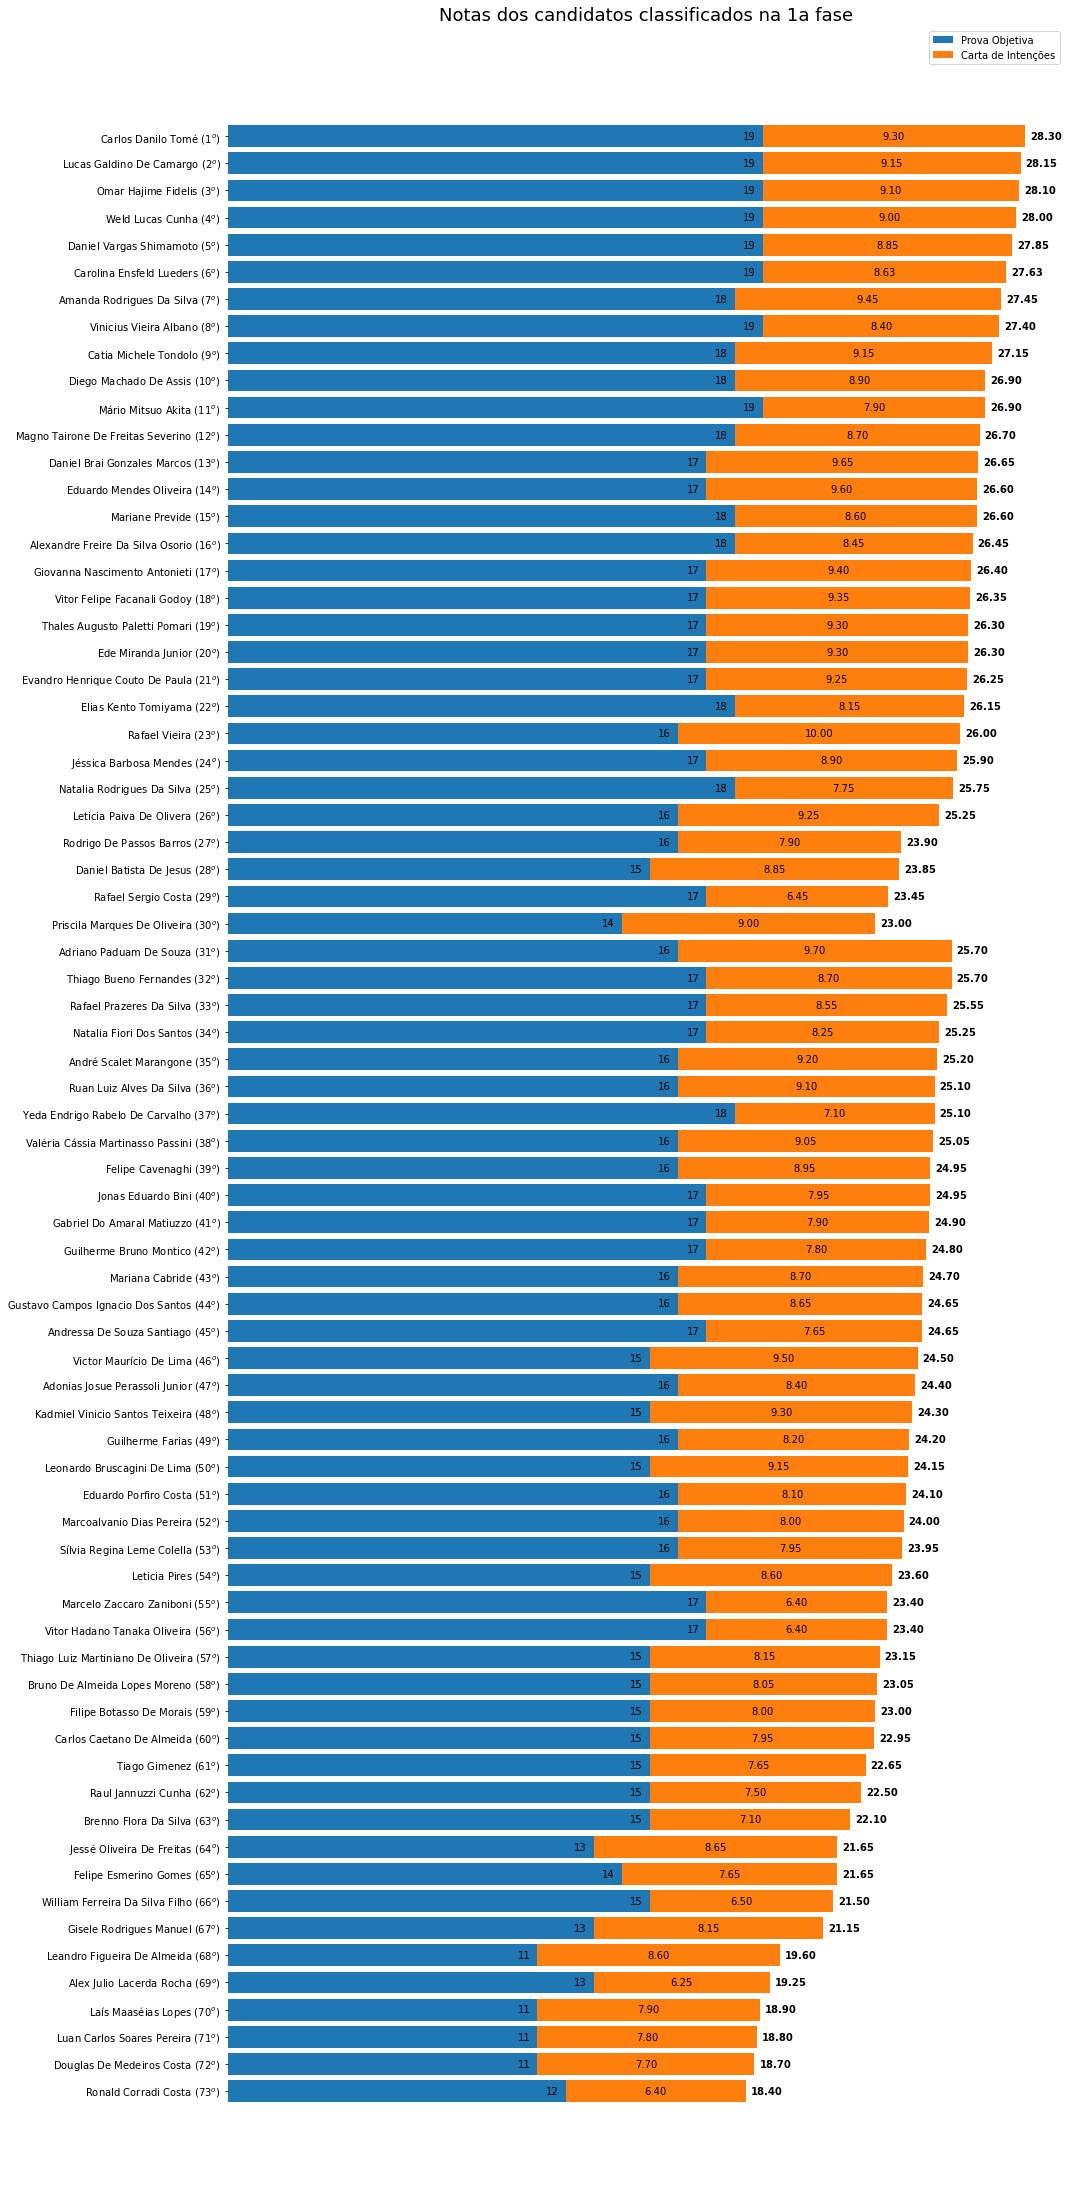

In [72]:
fig, ax = plt.subplots()

fig.set_size_inches(15, 40)

y_pos = np.arange(len(resultado))

p1 = ax.barh(y_pos, resultado['Prova Objetiva'], label='Prova Objetiva')
p2 = ax.barh(y_pos, resultado['Carta de Intenções'], left=resultado['Prova Objetiva'], label='Carta de Intenções')

ax.set_title('Notas dos candidatos classificados na 1a fase', fontsize=18)
ax.legend()

ax.set_yticks(y_pos)
ax.set_yticklabels(resultado['Nome'] + ' (' +resultado['Classificação'].map(str) + '$^o$)')
ax.invert_yaxis()

ax.xaxis.set_visible(False)

ax.bar_label(p1, padding=-20)
ax.bar_label(p2, label_type='center', fmt='%.2f')
ax.bar_label(p2, padding=5, fmt='%.2f', fontweight='bold')

plt.box(on=None)
plt.show()